# Changes in vertical flux of Fe

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 
from statistics import mean
from matplotlib import style
from scipy import stats
import matplotlib.path as mpath

In [2]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['Fe_FLUX_IN_100m']

ds_list = []
ds = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds = xr.merge((ds, dsv))
    ds_list.append(ds)

Fe_FLUX_IN_100m
CPU times: user 18.3 ms, sys: 4.26 ms, total: 22.6 ms
Wall time: 400 ms


In [3]:
ds

<xarray.Dataset>
Dimensions:          (member_id: 34, nlat: 384, nlon: 320, time: 181, z_t: 60)
Coordinates:
  * time             (time) object 1920-07-02 12:00:00 ... 2100-07-02 12:00:00
    TLAT             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * member_id        (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    KMT              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz               (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Fe_FLUX_IN_100m  (member_id, time, nlat, nlon) float32 dask.array<chunksize=(34, 181, 384, 320), meta=np.ndarray>

In [4]:
grid = pop_tools.get_grid('POP_gx1v6')
lons = grid.TLONG
lats = grid.TLAT

In [5]:
#ds.time.values

In [6]:
#ds['time'] = np.arange(1920,2101,1)

In [7]:
ds.Fe_FLUX_IN_100m

<xarray.DataArray 'Fe_FLUX_IN_100m' (member_id: 34, time: 181, nlat: 384, nlon: 320)>
dask.array<open_dataset-4554b973f54f365fce5ea12c99b4ed13Fe_FLUX_IN_100m, shape=(34, 181, 384, 320), dtype=float32, chunksize=(34, 181, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1920-07-02 12:00:00 ... 2100-07-02 12:00:00
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Fe flux across 100 m (positive up)
    units:         nmol/s/cm^2
    grid_loc:      3112
    cell_methods:  time: mean
    coordinates:   TLONG TLAT z_w time

In [8]:
nmol_cm2_s_to_nmol_m2_d = 10000. * 86400.
ds['Fe_FLUX_IN_100m'] = ds['Fe_FLUX_IN_100m'] * nmol_cm2_s_to_nmol_m2_d
ds.Fe_FLUX_IN_100m.attrs['units'] = 'nmol/m^2/d'

In [9]:
ds.Fe_FLUX_IN_100m

<xarray.DataArray 'Fe_FLUX_IN_100m' (member_id: 34, time: 181, nlat: 384, nlon: 320)>
dask.array<mul, shape=(34, 181, 384, 320), dtype=float32, chunksize=(34, 181, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1920-07-02 12:00:00 ... 2100-07-02 12:00:00
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Fe flux across 100 m (positive up)
    units:         nmol/m^2/d
    grid_loc:      3112
    cell_methods:  time: mean
    coordinates:   TLONG TLAT z_w time

### extract 1920s

In [10]:
ds.time.isel(time=slice(0,10)).values

array([cftime.DatetimeNoLeap(1920, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1921, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1922, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1923, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1924, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1925, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1926, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1927, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1928, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1929, 7, 2, 12, 0, 0, 0)], dtype=object)

In [11]:
ds_1920s = ds.isel(time=slice(0,10)).mean(dim='time')

### extract 1990s

In [12]:
ds.time.isel(time=slice(70,80)).values

array([cftime.DatetimeNoLeap(1990, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1991, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1992, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1993, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1994, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1995, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1996, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1997, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1998, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1999, 7, 2, 12, 0, 0, 0)], dtype=object)

In [13]:
ds_1990s = ds.isel(time=slice(70,80)).mean(dim='time')

### Extract 2090s

In [14]:
ds.time.isel(time=slice(-11,-1)).values

array([cftime.DatetimeNoLeap(2090, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2091, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2092, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2093, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2094, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2095, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2096, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2097, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2098, 7, 2, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2099, 7, 2, 12, 0, 0, 0)], dtype=object)

In [15]:
ds_2090s = ds.isel(time=slice(-11,-1)).mean(dim='time')

### take ensemble mean

In [16]:
ensemble_mean_1920s = ds_1920s.mean(dim='member_id')
ensemble_mean_1990s = ds_1990s.mean(dim='member_id')
ensemble_mean_2090s = ds_2090s.mean(dim='member_id')

In [17]:
diff = ensemble_mean_2090s.Fe_FLUX_IN_100m - ensemble_mean_1920s.Fe_FLUX_IN_100m

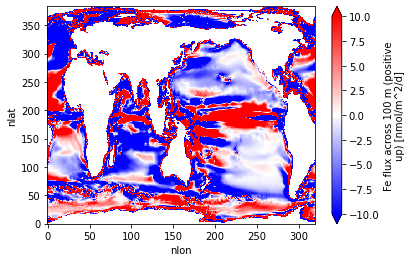

In [18]:
diff.plot(cmap='bwr',vmin=-10,vmax=10)

In [19]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8
    
    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

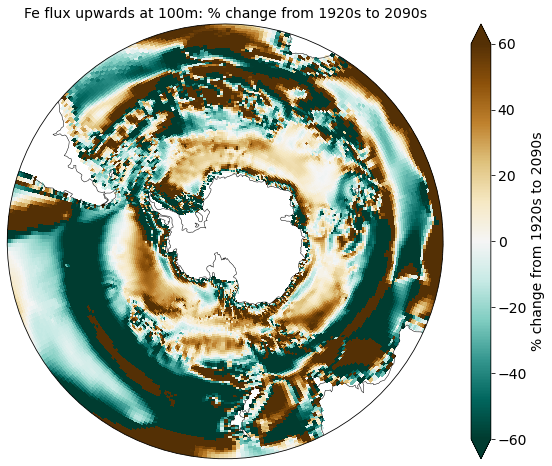

In [20]:
fig = plt.figure(figsize=(10,8))
#----------PLOT MEAN STATE---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats,diff/ensemble_mean_1920s.Fe_FLUX_IN_100m * 100.)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('Fe flux upwards at 100m: % change from 1920s to 2090s',fontsize=14)
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-60, vmax=60, 
                 #vmin=0.000001,vmax=0.0001,
                 cmap='BrBG_r',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='% change from 1920s to 2090s',size=14)
cbar1.ax.tick_params(labelsize=14)

#fig.savefig('/glade/work/kristenk/figs/change_in_Fe_mean_150m.png', bbox_inches='tight', dpi=300, format='png');

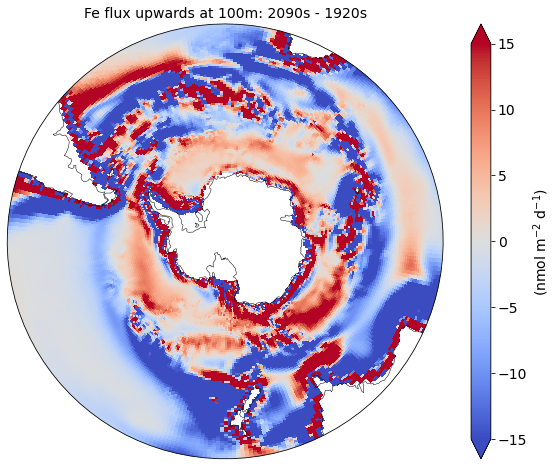

In [21]:
fig = plt.figure(figsize=(10,8))

lon, lat, field = adjust_pop_grid(lons, lats,diff)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('Fe flux upwards at 100m: 2090s - 1920s',fontsize=14)
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-15, vmax=15, 
                 #vmin=0.000001,vmax=0.0001,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(nmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)

#fig.savefig('/glade/work/kristenk/figs/change_in_Fe_mean_150m.png', bbox_inches='tight', dpi=300, format='png');

### try zonal mean

In [22]:
zonal_1920s = ensemble_mean_1920s.isel(nlat=slice(0,93)).mean(dim='nlon')
zonal_1990s = ensemble_mean_1990s.isel(nlat=slice(0,93)).mean(dim='nlon')
zonal_2090s = ensemble_mean_2090s.isel(nlat=slice(0,93)).mean(dim='nlon')
lats_zonal = lats.isel(nlat=slice(0,93)).mean(dim='nlon')

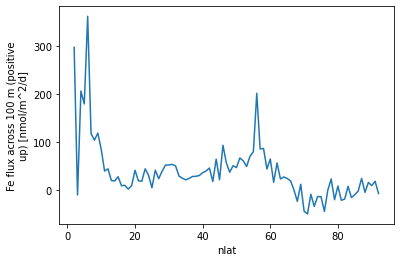

In [23]:
zonal_1920s.Fe_FLUX_IN_100m.plot()

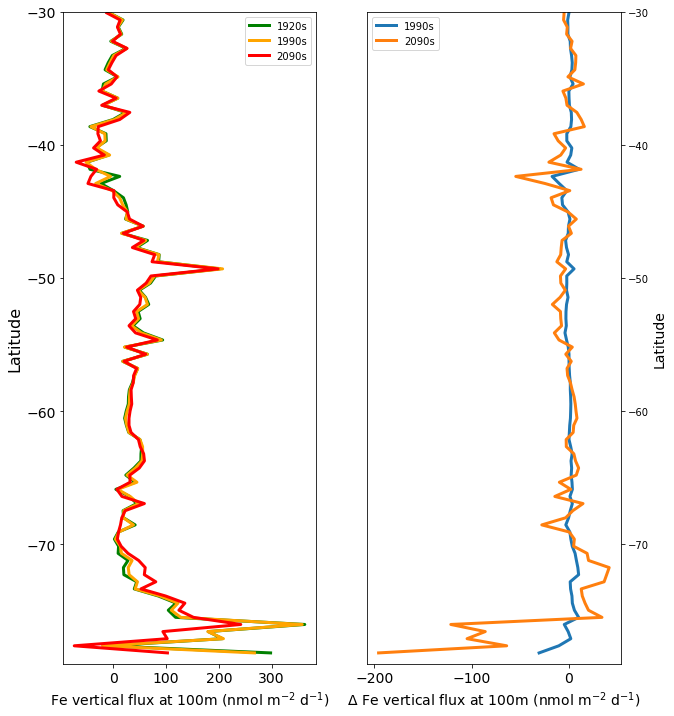

In [24]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(1,2,1)
#ax.set_title('a) Fe vertical flux 100m', x=0.4)
ax.set_ylim(-79,-30)
#ax.set_xlim(0.25,0.85)
ax.plot(zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='1920s', linewidth=3,color='green')
ax.plot(zonal_1990s['Fe_FLUX_IN_100m'],lats_zonal,  label='1990s', linewidth=3,color='orange')
ax.plot(zonal_2090s['Fe_FLUX_IN_100m'],lats_zonal,  label='2090s', linewidth=3,color='red')
ax.legend()
ax.set_ylabel(ylabel='Latitude',fontsize=16)
ax.set_xlabel(xlabel='Fe vertical flux at 100m (nmol m$^{-2}$ d$^{-1}$)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### difference
ax = fig.add_subplot(1,2,2)
ax.set_ylim(-79,-30)
#ax.set_xlim(-0.1,0.1)
#ax.set_title('b)${\Delta}$ Fe vertical flux 100m', x=0.4)
ax.plot(zonal_1990s['Fe_FLUX_IN_100m']-zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='1990s', linewidth=3)
ax.plot(zonal_2090s['Fe_FLUX_IN_100m']-zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='2090s', linewidth=3)
ax.legend()
ax.set_ylabel(ylabel='Latitude',fontsize=14)
ax.set_xlabel(xlabel='${\Delta}$ Fe vertical flux at 100m (nmol m$^{-2}$ d$^{-1}$)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='x', nbins=4)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right();
#fig.savefig('/glade/work/kristenk/figs/zonal_changes_diatfrac.png', bbox_inches='tight', dpi=300, format='png');

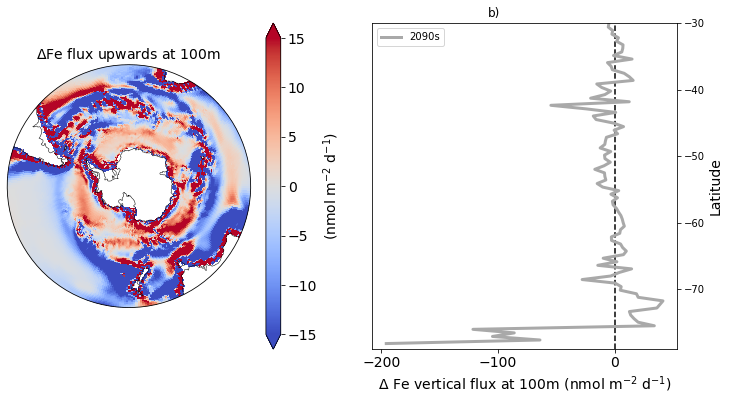

In [25]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection=ccrs.SouthPolarStereo())
ax.set_title('${\Delta}$Fe flux upwards at 100m',fontsize=14)
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

lon, lat, field = adjust_pop_grid(lons, lats,diff)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-15, vmax=15, 
                 #vmin=0.000001,vmax=0.0001,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(nmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)


######### zonal
### difference
ax = fig.add_subplot(1,2,2)
ax.set_ylim(-79,-30)
#ax.set_xlim(-0.1,0.1)
ax.set_title('b)', x=0.4)
plt.axvline(x=0,color='black',linestyle='--')
#ax.plot(zonal_1990s['Fe_FLUX_IN_100m']-zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='1990s', linewidth=3)
ax.plot(zonal_2090s['Fe_FLUX_IN_100m']-zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='2090s', linewidth=3, color='darkgray')
ax.legend()
ax.set_ylabel(ylabel='Latitude',fontsize=14)
ax.set_xlabel(xlabel='${\Delta}$ Fe vertical flux at 100m (nmol m$^{-2}$ d$^{-1}$)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='x', nbins=4)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right();

#fig.savefig('/glade/work/kristenk/figs/change_in_Fe_mean_150m.png', bbox_inches='tight', dpi=300, format='png');

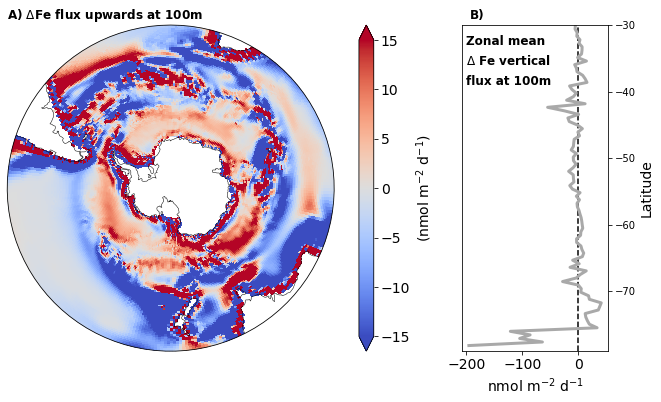

In [27]:
fig = plt.figure(constrained_layout=True,figsize=(12,6))
ax = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(ax[0:3], projection=ccrs.SouthPolarStereo())

ax1.set_title('A) ${\Delta}$Fe flux upwards at 100m',fontsize=12, fontweight='bold',x=0.3)
ax1.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)
#################### end circle

lon, lat, field = adjust_pop_grid(lons, lats,diff)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

pc=ax1.pcolormesh(lon, lat, 
                 field, 
                 vmin=-15, vmax=15, 
                 #vmin=0.000001,vmax=0.0001,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax1.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax1,extend='both')
cbar1.set_label(label='(nmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)





ax1 = fig.add_subplot(ax[3:4])
ax1.set_ylim(-79,-30)
#ax.set_xlim(-0.1,0.1)
ax1.set_title('B)', x=0.1, fontsize=12,  fontweight='bold')
plt.axvline(x=0,color='black',linestyle='--')
ax1.plot(zonal_2090s['Fe_FLUX_IN_100m']-zonal_1920s['Fe_FLUX_IN_100m'],lats_zonal,  label='2090s', linewidth=3, color='darkgray')
plt.annotate('Zonal mean',(-200, -33), fontsize=12, fontweight='bold')
plt.annotate('${\Delta}$ Fe vertical',(-200, -36), fontsize=12, fontweight='bold')
plt.annotate('flux at 100m',(-200, -39), fontsize=12, fontweight='bold')
ax1.set_ylabel(ylabel='Latitude',fontsize=14)
ax1.set_xlabel(xlabel='nmol m$^{-2}$ d$^{-1}$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='x', nbins=4)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right();

fig.savefig('/glade/work/kristenk/figs/Fe_upwards_flux_change.png', bbox_inches='tight', dpi=300, format='png');


<module 'matplotlib.pyplot' from '/glade/work/kristenk/miniconda/envs/krill/lib/python3.7/site-packages/matplotlib/pyplot.py'>

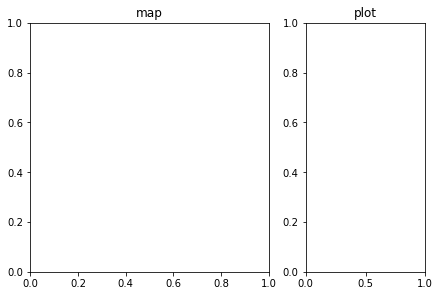

In [41]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(ax[0:2])
ax1.set_title('map')
ax1 = fig.add_subplot(ax[-1])
ax1.set_title('plot')
plt